### Adding a custom callback for keras during embedding
This notebook shows you how to use custom callbacks during training. In this example, we use early stopping to train the network until loss reaches some desired plateau. 

In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

### load data

In [2]:
from torchvision import datasets, transforms

# Download and load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Convert PyTorch tensor to NumPy array
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
train_images.shape, train_labels.shape

((60000, 784), (60000,))

### create parametric umap model

In [3]:
import keras

In [4]:
from umap.parametric_umap import ParametricUMAP

/n/groups/datta/tim_sainburg/conda_envs/parametricumap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
keras_fit_kwargs = {"callbacks": [
    keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=10**-2,
        patience=10,
        verbose=1,
    )
]}

In [6]:
embedder = ParametricUMAP(
    verbose=True,
    keras_fit_kwargs = keras_fit_kwargs,
    n_training_epochs=5
)

In [ ]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(keras_fit_kwargs={'callbacks': [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7f6633927f10>]}, n_training_epochs=5)
Thu May 16 17:16:46 2024 Construct fuzzy simplicial set
Thu May 16 17:16:46 2024 Finding Nearest Neighbors
Thu May 16 17:16:46 2024 Building RP forest with 17 trees
Thu May 16 17:16:51 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 16 17:17:05 2024 Finished Nearest Neighbor Search
Thu May 16 17:17:07 2024 Construct embedding
Epoch 1/50
7797/7797 ━━━━━━━━━━━━━━━━━━━━ 419s 53ms/step - loss: 0.2039
Epoch 2/50
7797/7797 ━━━━━━━━━━━━━━━━━━━━ 343s 44ms/step - loss: 0.1797
Epoch 3/50
7797/7797 ━━━━━━━━━━━━━━━━━━━━ 319s 41ms/step - loss: 0.1782
Epoch 4/50
4263/7797 ━━━━━━━━━━━━━━━━━━━━ 2:25 41ms/step - loss: 0.1775

### plot results

In [13]:
embedding = embedder.embedding_

In [14]:
import matplotlib.pyplot as plt

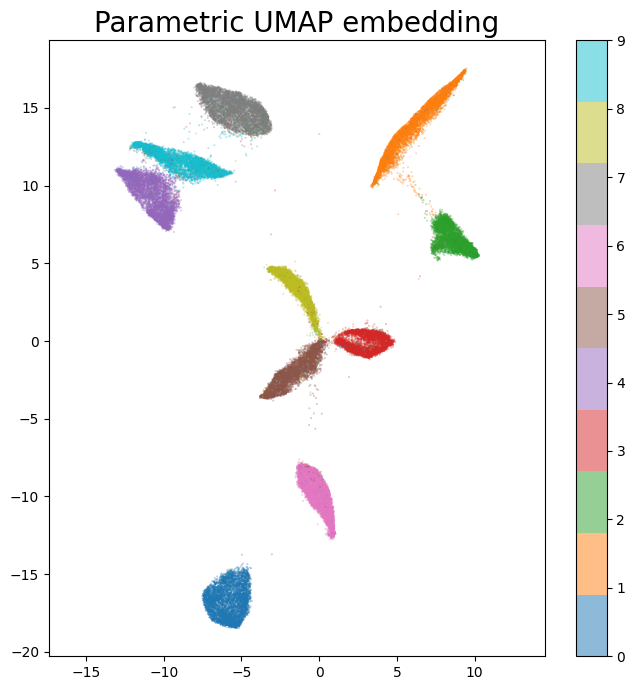

In [15]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_labels.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("Parametric UMAP embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [16]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

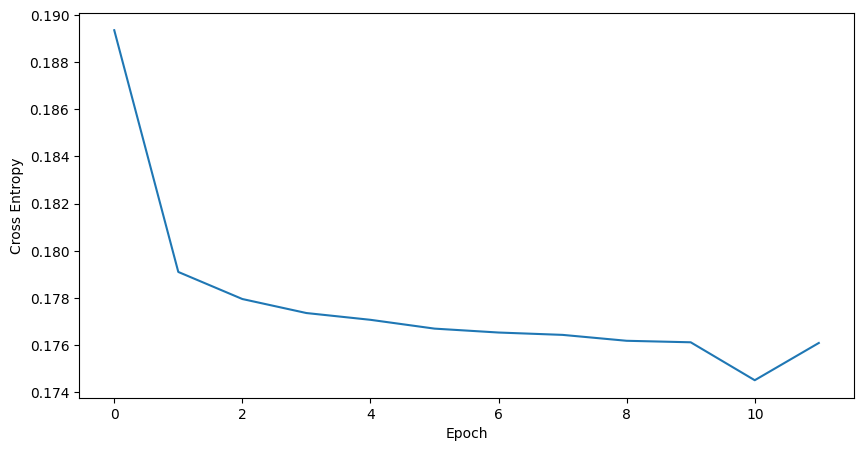

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')